<a href="https://colab.research.google.com/github/kridtapon/RAVI-MACD-Fusion/blob/main/RAVI_MACD_Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
import itertools

# Function to calculate RAVI
def calculate_ravi(df, short_period, long_period):
    high_roll = df['High'].rolling(window=long_period).max() - df['Low'].rolling(window=long_period).min()
    low_roll = df['High'].rolling(window=short_period).max() - df['Low'].rolling(window=short_period).min()
    ravi = (low_roll - high_roll) / high_roll * 100
    return ravi

# Function to calculate MACD
def calculate_macd(df, fast_period, slow_period, signal_period):
    macd = df['Close'].ewm(span=fast_period, adjust=False).mean() - df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

# Define stock and time period
symbol = 'TRGP'
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download stock data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define parameter ranges
ravi_short_range = range(10, 21, 2)
ravi_long_range = range(20, 41, 4)
macd_fast_range = range(8, 17, 2)
macd_slow_range = range(20, 31, 2)
macd_signal_range = range(5, 16, 2)
ravi_entry_range = np.arange(-40, -10, 10)
ravi_exit_range = np.arange(-90, -50, 10)

# Generate all parameter combinations
param_combinations = list(itertools.product(ravi_short_range, ravi_long_range, macd_fast_range, macd_slow_range, macd_signal_range, ravi_entry_range, ravi_exit_range))

best_performance = -np.inf
best_params = None

# Grid Search
for params in param_combinations:
    short_p, long_p, fast_p, slow_p, signal_p, entry_thresh, exit_thresh = params

    # Calculate indicators
    df['RAVI'] = calculate_ravi(df, short_p, long_p)
    df['MACD'], df['MACD_Signal'] = calculate_macd(df, fast_p, slow_p, signal_p)

    # Filter data for the test period (2020-2025)
    df_filter = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Define signals
    df_filter['Entry'] = (df_filter['MACD'] > df_filter['MACD_Signal']) & (df_filter['RAVI'] < entry_thresh)
    df_filter['Exit'] = (df_filter['MACD'] < df_filter['MACD_Signal']) & (df_filter['RAVI'] > exit_thresh)

    # Backtest
    portfolio = vbt.Portfolio.from_signals(
        close=df_filter['Close'],
        entries=df_filter['Entry'],
        exits=df_filter['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    # Calculate performance (Total Return)
    total_return = portfolio.total_return()

    # Track best parameters
    if total_return > best_performance:
        best_performance = total_return
        best_params = params

# Print best parameters and performance
print("Best Parameters:", best_params)
print("Best Total Return:", best_performance)


YF.download() has changed argument auto_adjust default to True


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Entry'] = (df_filter['MACD'] > df_filter['MACD_Signal']) & (df_filter['RAVI'] < entry_thresh)
<ipython-input-1-83f932505e04>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Exit'] = (df_filter['MACD'] < df_filter['MACD_Signal']) & (df_filter['RAVI'] > exit_thresh)
<ipython-input-1-83f932505e04>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

Best Parameters: (12, 36, 16, 20, 15, -40, -60)
Best Total Return: 34.63396333894634


<ipython-input-1-83f932505e04>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Entry'] = (df_filter['MACD'] > df_filter['MACD_Signal']) & (df_filter['RAVI'] < entry_thresh)
<ipython-input-1-83f932505e04>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Exit'] = (df_filter['MACD'] < df_filter['MACD_Signal']) & (df_filter['RAVI'] > exit_thresh)
<ipython-input-1-83f932505e04>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [7]:
# Calculate RAVI
df['RAVI'] = calculate_ravi(df, 12, 36)

# Calculate MACD and Signal Line
df['MACD'], df['MACD_Signal'] = calculate_macd(df, 16, 20, 15)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on MACD and Rolling RAVI strategy
df['Entry'] = (df['MACD'] > df['MACD_Signal']) & (df['RAVI'] < -40)
df['Exit'] = (df['MACD'] < df['MACD_Signal']) & (df['RAVI'] > -60)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                          3661969.469658
Total Return [%]                       3561.96947
Benchmark Return [%]                   396.466166
Max Gross Exposure [%]                      100.0
Total Fees Paid                      71258.414754
Max Drawdown [%]                        25.315476
Max Drawdown Duration                       114.0
Total Trades                                   23
Total Closed Trades                            23
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            60.869565
Best Trade [%]                         290.313405
Worst Trade [%]                         -8.134302
Avg Winning Trade [%]                   42.095606
Avg Losing Trade [%]                    -3.279912


[*********************100%***********************]  1 of 1 completed


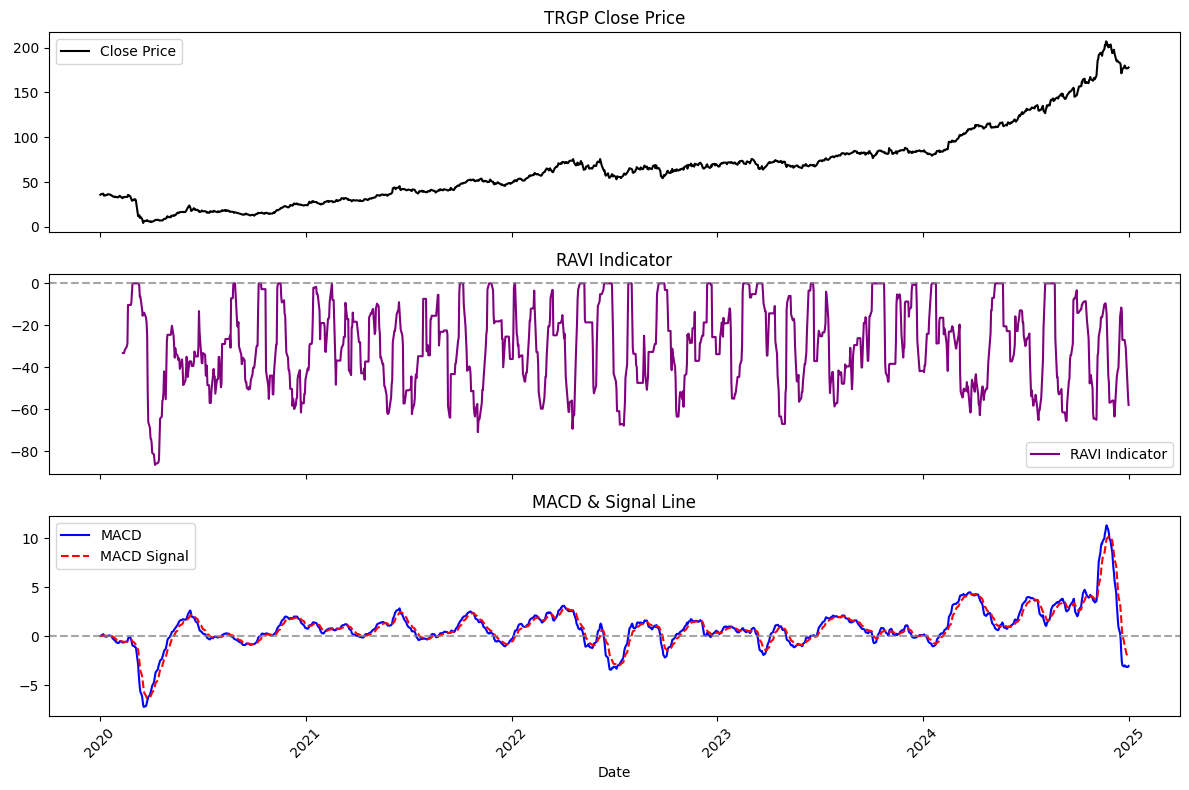

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate RAVI
def calculate_ravi(df, short_period, long_period):
    high_roll = df['High'].rolling(window=long_period).max() - df['Low'].rolling(window=long_period).min()
    low_roll = df['High'].rolling(window=short_period).max() - df['Low'].rolling(window=short_period).min()
    ravi = (low_roll - high_roll) / high_roll * 100
    return ravi

# Function to calculate MACD
def calculate_macd(df, fast_period, slow_period, signal_period):
    macd = df['Close'].ewm(span=fast_period, adjust=False).mean() - df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

# Define stock and time period
symbol = 'TRGP'
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download stock data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate indicators
df['RAVI'] = calculate_ravi(df, short_period=14, long_period=28)
df['MACD'], df['MACD_Signal'] = calculate_macd(df, fast_period=12, slow_period=26, signal_period=9)

# Plot Close Price and Indicators
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot Close Price
axes[0].plot(df.index, df['Close'], label='Close Price', color='black')
axes[0].set_title(f'{symbol} Close Price')
axes[0].legend()

# Plot RAVI Indicator
axes[1].plot(df.index, df['RAVI'], label='RAVI Indicator', color='purple')
axes[1].axhline(0, linestyle='--', color='gray', alpha=0.7)
axes[1].set_title('RAVI Indicator')
axes[1].legend()

# Plot MACD and Signal Line
axes[2].plot(df.index, df['MACD'], label='MACD', color='blue')
axes[2].plot(df.index, df['MACD_Signal'], label='MACD Signal', color='red', linestyle='dashed')
axes[2].axhline(0, linestyle='--', color='gray', alpha=0.7)
axes[2].set_title('MACD & Signal Line')
axes[2].legend()

# Final adjustments
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate RAVI (Range Action Verification Index)
def calculate_ravi(df, short_period=14, long_period=28):
    """
    Calculate the Range Action Verification Index (RAVI).
    """
    high_roll = df['High'].rolling(window=long_period).max() - df['Low'].rolling(window=long_period).min()
    low_roll = df['High'].rolling(window=short_period).max() - df['Low'].rolling(window=short_period).min()
    ravi = (low_roll - high_roll) / high_roll * 100
    return ravi

# Function to calculate MACD and Signal Line
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculate the MACD (Moving Average Convergence Divergence) and Signal Line.
    """
    macd = df['Close'].ewm(span=fast_period, adjust=False).mean() - df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate RAVI
df['RAVI'] = calculate_ravi(df)

# Calculate rolling RAVI threshold (e.g., rolling 20-period mean)
df['Rolling_RAVI'] = df['RAVI'].rolling(window=20).mean()

# Calculate MACD and Signal Line
df['MACD'], df['MACD_Signal'] = calculate_macd(df)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on MACD and Rolling RAVI strategy
df['Entry'] = (df['MACD'] > df['MACD_Signal']) & (df['Rolling_RAVI'] < -10)  # Buy when MACD crosses above signal line and rolling RAVI > 50
df['Exit'] = (df['MACD'] < df['MACD_Signal']) & (df['Rolling_RAVI'] > -50)  # Sell when MACD crosses below signal line and rolling RAVI < 50

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                            83359.563295
Total Return [%]                       -16.640437
Benchmark Return [%]                   180.172856
Max Gross Exposure [%]                      100.0
Total Fees Paid                       9172.576257
Max Drawdown [%]                        79.371873
Max Drawdown Duration                      1093.0
Total Trades                                   50
Total Closed Trades                            50
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                 40.0
Best Trade [%]                          47.066823
Worst Trade [%]                        -27.105312
Avg Winning Trade [%]                    9.813603
Avg Losing Trade [%]                    -5.988777


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate RAVI (Range Action Verification Index)
def calculate_ravi(df, short_period=14, long_period=28):
    """
    Calculate the Range Action Verification Index (RAVI).
    """
    high_roll = df['High'].rolling(window=long_period).max() - df['Low'].rolling(window=long_period).min()
    low_roll = df['High'].rolling(window=short_period).max() - df['Low'].rolling(window=short_period).min()
    ravi = (low_roll - high_roll) / high_roll * 100
    return ravi

# Function to calculate MACD and Signal Line
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculate the MACD (Moving Average Convergence Divergence) and Signal Line.
    """
    macd = df['Close'].ewm(span=fast_period, adjust=False).mean() - df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate RAVI
df['RAVI'] = calculate_ravi(df)

# Calculate MACD and Signal Line
df['MACD'], df['MACD_Signal'] = calculate_macd(df)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on MACD and Rolling RAVI strategy
df['Entry'] = (df['MACD'] > df['MACD_Signal']) & (df['RAVI'] < -10)  # Buy when MACD crosses above signal line and RAVI > 50
df['Exit'] = (df['MACD'] < df['MACD_Signal']) & (df['RAVI'] > -50)  # Sell when MACD crosses below signal line and RAVI < 50

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                            86203.704163
Total Return [%]                       -13.796296
Benchmark Return [%]                   180.172856
Max Gross Exposure [%]                      100.0
Total Fees Paid                       8570.560852
Max Drawdown [%]                        78.003718
Max Drawdown Duration                      1093.0
Total Trades                                   45
Total Closed Trades                            45
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            42.222222
Best Trade [%]                          47.066823
Worst Trade [%]                        -29.699886
Avg Winning Trade [%]                    9.730454
Avg Losing Trade [%]                    -6.339073


[*********************100%***********************]  1 of 1 completed


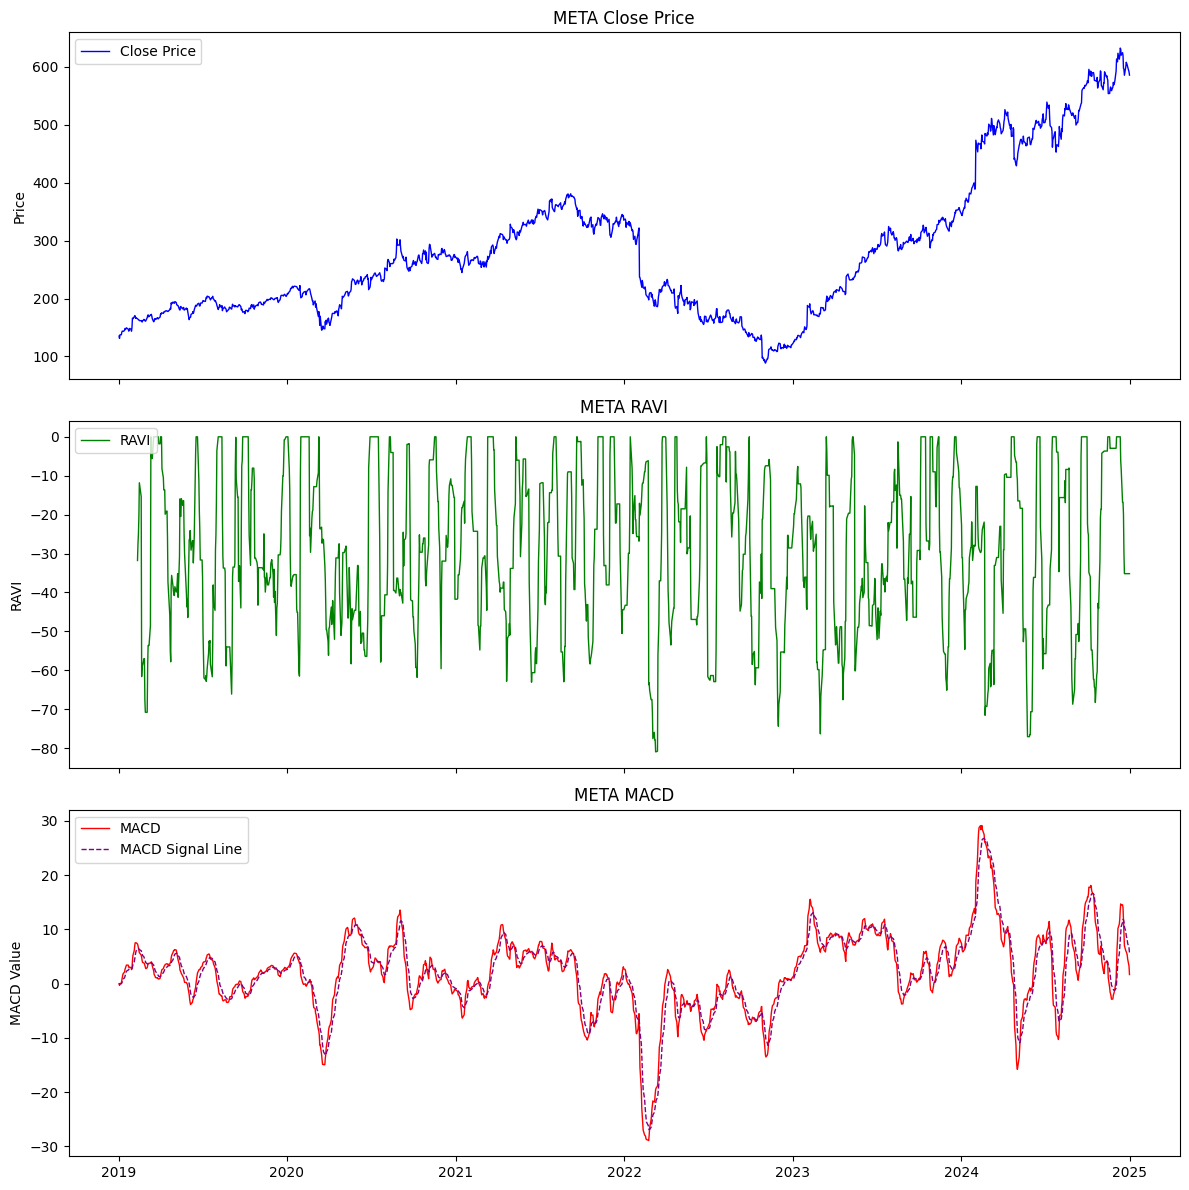

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate RAVI (Range Action Verification Index)
def calculate_ravi(df, short_period=14, long_period=28):
    """
    Calculate the Range Action Verification Index (RAVI).
    """
    high_roll = df['High'].rolling(window=long_period).max() - df['Low'].rolling(window=long_period).min()
    low_roll = df['High'].rolling(window=short_period).max() - df['Low'].rolling(window=short_period).min()
    ravi = (low_roll - high_roll) / high_roll * 100
    return ravi

# Function to calculate MACD and Signal Line
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculate the MACD (Moving Average Convergence Divergence) and Signal Line.
    """
    macd = df['Close'].ewm(span=fast_period, adjust=False).mean() - df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate RAVI
df['RAVI'] = calculate_ravi(df)

# Calculate MACD and Signal Line
df['MACD'], df['MACD_Signal'] = calculate_macd(df)

# Plotting the Close Price, RAVI, and MACD
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot Close Price
axs[0].plot(df.index, df['Close'], label='Close Price', color='blue', linewidth=1)
axs[0].set_title(f'{symbol} Close Price')
axs[0].set_ylabel('Price')
axs[0].legend(loc='upper left')

# Plot RAVI
axs[1].plot(df.index, df['RAVI'], label='RAVI', color='green', linewidth=1)
axs[1].set_title(f'{symbol} RAVI')
axs[1].set_ylabel('RAVI')
axs[1].legend(loc='upper left')

# Plot MACD and Signal Line
axs[2].plot(df.index, df['MACD'], label='MACD', color='red', linewidth=1)
axs[2].plot(df.index, df['MACD_Signal'], label='MACD Signal Line', color='purple', linestyle='--', linewidth=1)
axs[2].set_title(f'{symbol} MACD')
axs[2].set_ylabel('MACD Value')
axs[2].legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


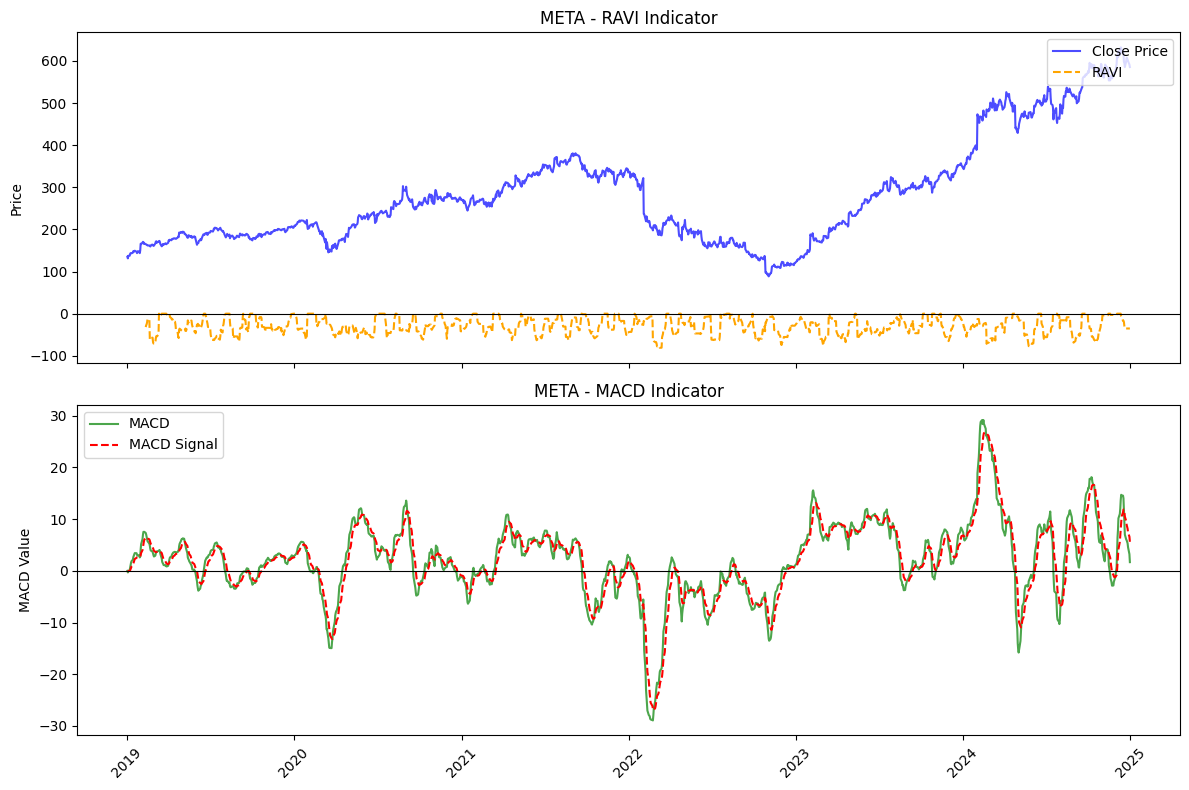

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate RAVI (Range Action Verification Index)
def calculate_ravi(df, short_period=14, long_period=28):
    """
    Calculate the Range Action Verification Index (RAVI).
    """
    high_roll = df['High'].rolling(window=long_period).max() - df['Low'].rolling(window=long_period).min()
    low_roll = df['High'].rolling(window=short_period).max() - df['Low'].rolling(window=short_period).min()
    ravi = (low_roll - high_roll) / high_roll * 100
    return ravi

# Function to calculate MACD and Signal Line
def calculate_macd(df, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculate the MACD (Moving Average Convergence Divergence) and Signal Line.
    """
    macd = df['Close'].ewm(span=fast_period, adjust=False).mean() - df['Close'].ewm(span=slow_period, adjust=False).mean()
    macd_signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, macd_signal

# Define the stock symbol and time period
symbol = 'META'  # SPY is the symbol for the S&P 500 ETF
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate RAVI
df['RAVI'] = calculate_ravi(df)

# Calculate MACD and Signal Line
df['MACD'], df['MACD_Signal'] = calculate_macd(df)

# Create a figure and axes for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Close Price and RAVI on the first axis
ax1.set_title(f'{symbol} - RAVI Indicator')
ax1.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.7)
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Plot RAVI
ax1.plot(df.index, df['RAVI'], label='RAVI', color='orange', linestyle='--')
ax1.axhline(0, color='black', linewidth=0.8)
ax1.legend(loc='upper right')

# Plot MACD and Signal Line on the second axis
ax2.set_title(f'{symbol} - MACD Indicator')
ax2.plot(df.index, df['MACD'], label='MACD', color='green', alpha=0.7)
ax2.plot(df.index, df['MACD_Signal'], label='MACD Signal', color='red', linestyle='--')
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_ylabel('MACD Value')
ax2.legend(loc='upper left')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df

,Close,High,Low,Open,Volume,RAVI,MACD,MACD_Signal
Date,,,,,,,,
2019-01-02,135.163681,136.986719,128.070780,128.499152,28146200,NaN,0.000000,0.000000
2019-01-03,131.238678,136.648007,130.621027,134.177449,22717900,NaN,-0.313106,-0.062621
2019-01-04,137.425049,137.474862,133.241034,133.500039,29002100,NaN,-0.061349,-0.062367
2019-01-07,137.524658,138.341530,135.392803,137.036517,20089300,NaN,0.144542,-0.020985
2019-01-08,141.987625,142.595304,139.008998,139.357672,26263800,NaN,0.660226,0.115257
...,...,...,...,...,...,...,...,...
2024-12-24,607.750000,607.989990,599.280029,602.719971,4726100,-35.16269,5.894266,8.867442
2024-12-26,603.349976,606.299988,598.940002,605.479980,6081400,-35.16269,5.342108,8.162375
2024-12-27,599.809998,601.849976,589.799988,599.409973,8084200,-35.16269,4.566236,7.443147
